In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot,get_result
import mmcv
# show the resu
from matplotlib import pyplot as plt
import cv2

In [2]:
config_file = './myconfigs/bigdata/cascade_rcnn_dconv_c3-c5_x101_32x4d_fpn_snms_1x_bigdata.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = './work_dirs/cascade_rcnn_dconv_c3-c5_x101_32x4d_fpn_snms_1x_bigdata/latest.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

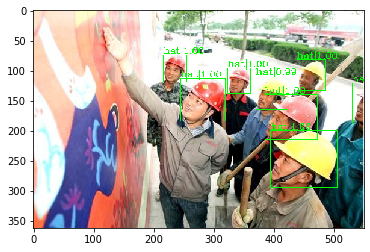

In [4]:
# test a single image
img = './data/safehat/JPEGImages/001357.jpg'
# img = './hat_test/test1.jpg'
result = inference_detector(model,img)
img = get_result(img,result,class_names=model.CLASSES,auto_thickness=True,color_dist={'hat':'green','person':'red'})
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.imsave('result.jpg',cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [1]:
from tools.process_video import _get_db
import cv2
import logging
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from io import StringIO,BytesIO

In [2]:
logging.basicConfig(filename='log.txt',filemode="w", format="%(asctime)s %(name)s:%(levelname)s:%(message)s", datefmt="%d-%M-%Y %H:%M:%S")
db = _get_db()
import time
current_time  = time.localtime(time.time())

In [3]:
current_time = str(current_time.tm_year)+'-'+str(current_time.tm_mon)+'-'+str(current_time.tm_mday)

In [4]:
current_time

'2020-3-10'

In [10]:
img = './data/safehat/JPEGImages/001357.jpg'
img = open(img,'rb').read()

In [11]:
if current_time not in db.list_collection_names():
    db.create_collection(current_time)
    logging.info('create a new dabase which is {0}'.format(current_time))
db[current_time].insert_one({
    'time':time.localtime(time.time()),
    'type':'hat',
    'img':bytes(img)
    })

In [80]:
db[current_time].delete_one({'type':'hat'})

In [12]:
x = db[current_time].find_one({'type':'hat'})

In [13]:
x['time']

[2020, 3, 10, 19, 38, 46, 1, 70, 0]

In [14]:
x['type']

'hat'

In [75]:
from PIL import Image
from io import StringIO,BytesIO

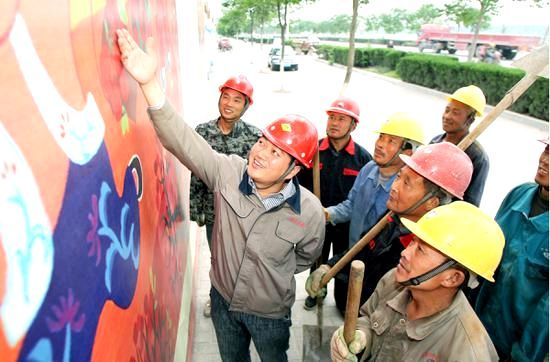

In [16]:
Image.open(BytesIO(x['img']))

In [4]:
import mmcv
from mmdet.apis import init_detector, inference_detector, show_result_pyplot,get_result
import argparse
from tqdm import tqdm
import os
import os.path as osp
import cv2
import numpy as np
from cv2 import VideoWriter_fourcc
from pymongo import MongoClient
import logging
from utils import Sort
from utils.videoutils import video_tools as vt

In [5]:
video = mmcv.VideoReader('./test.avi')
output_path = './test_out.mp4'
fourcc='mp4v'
resolution = (video.width, video.height)
video_fps = video.fps
require_fps = 15
if require_fps is None:
    require_fps = video_fps
if require_fps > video_fps:
    require_fps = video_fps
vwriter = cv2.VideoWriter(
    output_path,
    VideoWriter_fourcc(*fourcc),
    require_fps,
    resolution
    )
require_fps

15

In [6]:
sub_video = np.array(video[0:50])
famers, results = vt.imgs_detection(sub_video,model,step=3)

In [7]:
results.shape

(17, 2)

In [8]:
bboxs_psn = results[:,1]
bboxs_psn.shape

(17,)

In [9]:
psn_tracker = Sort()
bboxs_psn = vt.track(bboxs_psn,psn_tracker)
len(bboxs_psn)

17

In [10]:
famers_psn,bboxs_psn = vt.fill(bboxs_psn,famers)
len(bboxs_psn)

49

In [11]:
t = [np.pad(x,((0,0),(0,1)),'constant') for x in bboxs_psn]

In [12]:
t[1][:,-1]

array([0., 0., 0., 0.])

In [13]:
for x,y in zip(t,famers_psn):
    x[:,-1] = y

In [15]:
t[0]

array([[1.04141467e+03, 1.66693909e+02, 1.06141943e+03, 1.91766037e+02,
        4.00000000e+00, 0.00000000e+00],
       [3.22310760e+02, 1.31626800e+02, 3.81298401e+02, 1.93289810e+02,
        3.00000000e+00, 0.00000000e+00],
       [1.04126123e+03, 1.66763550e+02, 1.06134021e+03, 1.91712128e+02,
        2.00000000e+00, 0.00000000e+00],
       [3.22447357e+02, 1.31799484e+02, 3.81117767e+02, 1.93430084e+02,
        1.00000000e+00, 0.00000000e+00]])

In [16]:
bboxs_psn_c = np.concatenate(t,axis=0)
bboxs_psn_c.shape

(167, 6)

In [17]:
x = bboxs_psn_c[:,-2:].astype(int)

In [18]:
x.shape

(167, 2)

In [19]:
x[:,-2].reshape(-1,1)

array([[ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 4],

In [20]:
s,i = np.unique(x[:,-2].reshape(-1,1),axis=0,return_index=True)

In [21]:
s

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 6],
       [ 8],
       [12],
       [14],
       [16],
       [21]])

In [22]:
i

array([  3,   2,   1,   0, 126,  96, 135, 134, 133, 163])

In [23]:
t = np.array(t)
t.shape


(49,)

In [24]:
index = x[i,1]
index = np.unique(index)
index

array([ 0, 24, 33, 36, 48])

In [1]:
target = t[index]
target[0]

NameError: name 't' is not defined

In [2]:
import time 
time_get = time.localtime(time.time())
print(time_get.tm_year,time_get.tm_mon,time_get.tm_mday)

2020 3 11


In [61]:
plt.imsave('result.jpg',video[1][y1:y2,x1:x2,:])

In [59]:
target = set()
result_frams = []


(148,)

In [ ]:
for index,bbox_psn in zip(famers_psn,bboxs_psn):
    bbox_psn[:,-1]

In [ ]:
for frame in tqdm(video):
    result = inference_detector(model, frame)
    frame_result = get_result(
        frame,
        result,
        class_names=model.CLASSES,
        auto_thickness=True,
        color_dist={'hat':hat_color,'person':person_color})
    vwriter.write(frame_result)
print('process finshed')

In [ ]:
{
    "time":"year-month-day-hour-minute", 
    "info":{
        "img":b'dsadasdasd',
        "source_video":"video_name",
        "source_time":"hour-minute-second"
    }
}